<a href="https://colab.research.google.com/github/bharathulaprasad/Assignment_06/blob/main/Assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
cancerdata = load_breast_cancer()
print(cancerdata.feature_names)
print(cancerdata.target_names)
cancerdata.data.shape
can = pd.DataFrame(cancerdata.data)
can

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [99]:
can = pd.DataFrame(cancerdata.data)
can.columns=cancerdata.feature_names
can.head()
can.describe
print("No of Nan in the whole dataset : %d\n" %np.sum(can.isnull().sum())) # => No Nan
print("No of duplicated features in the whole dataset : %d" %(can.transpose().drop_duplicates().transpose().shape[1] - can.shape[1])) # => No duplicated features

No of Nan in the whole dataset : 0

No of duplicated features in the whole dataset : 0


No handles with labels found to put in legend.


Accuracy of logistic regression classifier on test set: 0.95
[[176  11]
 [ 16 310]]
Train Accuracy: 0.9821428571428571
Test Accuracy: 0.9473684210526315


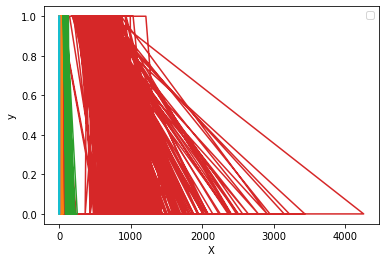

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.10, 
                                                    test_size=0.90, random_state=0)
logreg=LogisticRegression(max_iter=100000)


logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print("Train Accuracy:",logreg.score(X_train, y_train))
print("Test Accuracy:",logreg.score(X_test, y_test))
plt.plot(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()




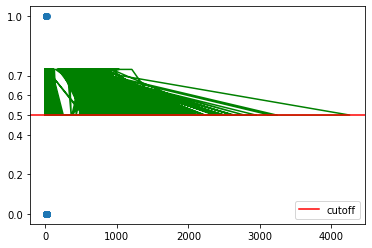

In [131]:
# Fit the data to a logistic regression model.
from scipy.special import expit
logreg = LogisticRegression(solver='lbfgs', C=1e5, max_iter=10000)
logreg.fit(X_test, y_test)

logreg.fit(X_test[:,0].reshape(-1,1), y_test)
plt.scatter(X_test[:,0],y_test)

sigmoid = expit(y_test)
plt.plot(X_test,sigmoid.ravel(),c="green")
plt.yticks([0, 0.2, 0.4, 0.5, 0.6, 0.7, 1])
plt.axhline(.5, color="red", label="cutoff")
plt.legend(loc="lower right")


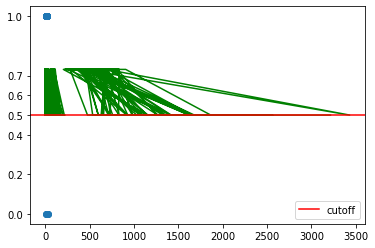

In [133]:
# Fit the data to a logistic regression model.
from scipy.special import expit
logreg = LogisticRegression(solver='lbfgs', C=1e5, max_iter=10000)
logreg.fit(X_train, y_train)

logreg.fit(X_train[:,0].reshape(-1,1), y_train)
plt.scatter(X_train[:,0],y_train)

sigmoid = expit(y_train)
plt.plot(X_train,sigmoid.ravel(),c="green")
plt.yticks([0, 0.2, 0.4, 0.5, 0.6, 0.7, 1])
plt.axhline(.5, color="red", label="cutoff")
plt.legend(loc="lower right")


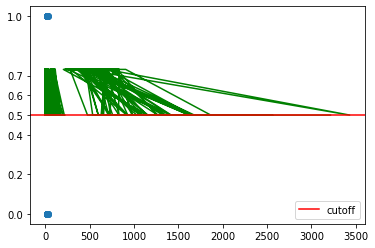

In [135]:
# Fit the data to a logistic regression model.
from scipy.special import expit
logreg = LogisticRegression(solver='lbfgs', C=1e5, max_iter=10000)
logreg.fit(X_train, y_train)

logreg.fit(X_train[:,1].reshape(-1,1), y_train)
plt.scatter(X_train[:,1],y_train)

sigmoid = expit(y_train)
plt.plot(X_train,sigmoid.ravel(),c="green")
plt.yticks([0, 0.2, 0.4, 0.5, 0.6, 0.7, 1])
plt.axhline(.5, color="red", label="")
plt.legend(loc="lower right")

In [138]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.20, 
                                                    test_size=0.80, random_state=0)
logreg=LogisticRegression(max_iter=100000)

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
model=logreg.fit(X_train,y_train)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print("Train Accuracy:",logreg.score(X_train, y_train))
print("Test Accuracy:",logreg.score(X_test, y_test))

Accuracy of logistic regression classifier on test set: 0.94
[[157  12]
 [ 15 272]]
Train Accuracy: 0.9911504424778761
Test Accuracy: 0.9407894736842105


In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.30, 
                                                    test_size=0.70, random_state=0)
logreg=LogisticRegression(max_iter=100000)

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
model=logreg.fit(X_train,y_train)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
confusion_matrix = confusion_matrix(y_test, y_pred)
model=logreg.fit(X_train,y_train)

print("Train Accuracy:",logreg.score(X_train, y_train))
print("Test Accuracy:",logreg.score(X_test, y_test))

Accuracy of logistic regression classifier on test set: 0.95
Train Accuracy: 0.9764705882352941
Test Accuracy: 0.9473684210526315


In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.40, 
                                                    test_size=0.60, random_state=0)
logreg=LogisticRegression(max_iter=100000)
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
model=logreg.fit(X_train,y_train)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
confusion_matrix = confusion_matrix(y_test, y_pred)

model=logreg.fit(X_train,y_train)

print("Train Accuracy:",logreg.score(X_train, y_train))
print("Test Accuracy:",logreg.score(X_test, y_test))

Accuracy of logistic regression classifier on test set: 0.96
Train Accuracy: 0.960352422907489
Test Accuracy: 0.956140350877193


In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.50, 
                                                    test_size=0.50, random_state=0)
logreg=LogisticRegression(max_iter=100000)

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
model=logreg.fit(X_train,y_train)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
confusion_matrix = confusion_matrix(y_test, y_pred)
model=logreg.fit(X_train,y_train)

print("Train Accuracy:",logreg.score(X_train, y_train))
print("Test Accuracy:",logreg.score(X_test, y_test))

Accuracy of logistic regression classifier on test set: 0.96
Train Accuracy: 0.9612676056338029
Test Accuracy: 0.9578947368421052


In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.60, 
                                                    test_size=0.40, random_state=0)
logreg=LogisticRegression(max_iter=100000)
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
model=logreg.fit(X_train,y_train)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
confusion_matrix = confusion_matrix(y_test, y_pred)

model=logreg.fit(X_train,y_train)

print("Train Accuracy:",logreg.score(X_train, y_train))
print("Test Accuracy:",logreg.score(X_test, y_test))

Accuracy of logistic regression classifier on test set: 0.97
Train Accuracy: 0.9648093841642229
Test Accuracy: 0.9692982456140351
